In [5]:
import matplotlib.pyplot as plt
import numpy as np
import vegas


In [6]:
print(vegas.__version__)

5.1.1


In [11]:
def g(x):
    try:
        a = x[:,-1]
    except:
        a = x[-1]
    return a

In [22]:
integ = vegas.Integrator([[0, 1]]*2)
#result = integ(g, nitn=10, neval=10000) #beta=0 means uniform sampling over all hcubes
result = integ(g, nitn=10, neval=10000, beta=0)
print(result.summary())

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.500006(42)    0.500006(42)        0.00     1.00
  2   0.500103(98)    0.500021(38)        0.83     0.36
  3   0.49988(11)     0.500006(36)        1.14     0.32
  4   0.49999(11)     0.500005(34)        0.76     0.52
  5   0.50007(11)     0.500010(33)        0.64     0.63
  6   0.49986(11)     0.499998(31)        0.86     0.51
  7   0.50014(10)     0.500010(30)        1.00     0.42
  8   0.50007(10)     0.500015(29)        0.91     0.50
  9   0.499949(99)    0.500010(28)        0.85     0.56
 10   0.49992(10)     0.500004(27)        0.82     0.60



In [23]:
samples = []
for x, _ in integ.random_batch():
    samples.append(x)
    
allx = np.concatenate(samples)

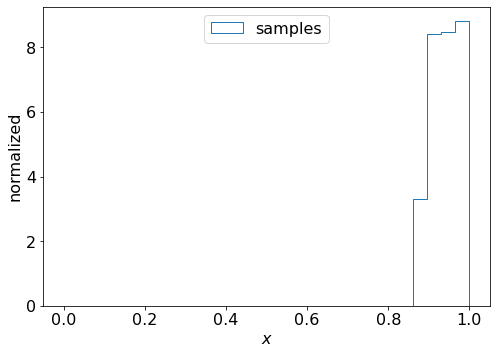

In [24]:
FONTSIZE=16
plt.rcParams.update({'font.size':FONTSIZE})
fig = plt.figure(figsize=(8,5.5))
bins = np.linspace(0,1,30)
plt.hist(allx[:,-1], bins=bins, histtype='step', density=True, label='samples')
plt.xlabel(r'$x$')
plt.ylabel('normalized')
plt.legend(loc='upper center')
plt.show()